In [2]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('www.csv')

In [4]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Unnamed: 17,case_id.1,Stay
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095,NaN,318439,0-10
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018,NaN,318440,0-10
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492,NaN,318441,0-10
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173,NaN,318442,0-10
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161,NaN,318443,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313,NaN,455491,0-10
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510,NaN,455492,0-10
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190,NaN,455493,0-10
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435,NaN,455494,0-10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [6]:
data.head

<bound method NDFrame.head of         case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        318439             21                  c                   3   
1        318440             29                  a                   4   
2        318441             26                  b                   2   
3        318442              6                  a                   6   
4        318443             28                  b                  11   
...         ...            ...                ...                 ...   
137052   455491             11                  b                   2   
137053   455492             25                  e                   1   
137054   455493             30                  c                   3   
137055   455494              5                  a                   1   
137056   455495              6                  a                   6   

       Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0            

In [7]:
data.shape

(137057, 20)

In [8]:
data.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                35
patientid                                 0
City_Code_Patient                      2157
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Unnamed: 17                          137057
case_id.1                                 0
Stay                                      0
dtype: int64

In [9]:
data.shape 

(137057, 20)

In [10]:
data.size

2741140

<Axes: >

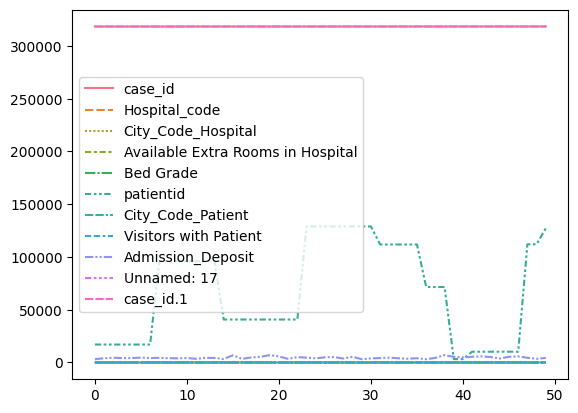

In [11]:
sns.lineplot(data=data.head(50))

In [12]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Unnamed: 17', 'case_id.1', 'Stay'],
      dtype='object')

In [13]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Unnamed: 17,case_id.1,Stay
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095,NaN,318439,0-10
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018,NaN,318440,0-10
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492,NaN,318441,0-10
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173,NaN,318442,0-10
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161,NaN,318443,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313,NaN,455491,0-10
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510,NaN,455492,0-10
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190,NaN,455493,0-10
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435,NaN,455494,0-10


In [14]:
X = data[['City_Code_Hospital','Hospital_code','Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']]
Y = data['Stay']

In [15]:
X

,City_Code_Hospital,Hospital_code,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit
0,3,21,3,2,3095
1,4,29,2,4,4018
2,2,26,3,3,4492
3,6,6,3,3,4173
4,11,28,2,4,4161
...,...,...,...,...,...
137052,2,11,4,4,6313
137053,1,25,2,2,3510
137054,3,30,2,2,7190
137055,1,5,2,2,5435


In [17]:
Y

0         0-10
1         0-10
2         0-10
3         0-10
4         0-10
          ... 
137052    0-10
137053    0-10
137054    0-10
137055    0-10
137056    0-10
Name: Stay, Length: 137057, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(109645, 5) (27412, 5) (109645,) (27412,)


In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fit the model on the training data
model = RandomForestClassifier(n_estimators=100, random_state=70)
model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=70)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the ANN model
# hidden_layer_sizes: Tuple indicating the number of neurons and layers (e.g., (100,) means 1 layer with 100 neurons)
# max_iter: Number of epochs to train the model
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00     27412

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [25]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X = data[['City_Code_Hospital', 'Hospital_code', 'Available Extra Rooms in Hospital', 
          'Visitors with Patient', 'Admission_Deposit']]
Y = data['Stay']  # Assuming 'Stay' is the target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Initialize the LightGBM Classifier
model = LGBMClassifier(n_estimators=100,     # Number of boosting rounds
                       learning_rate=0.1,    # Learning rate
                       max_depth=-1,         # No limit on tree depth
                       random_state=42)      # Random seed for reproducibility

# Step 4: Train the model on the training set
model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
Y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print accuracy

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 109645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 109645, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightG

In [26]:
input_data = [
    [3, 21, 3, 2, 3095]  
]
prediction = model.predict(input_data)
print(f"Prediction for the input data: {prediction[0]}")

Prediction for the input data: 0-10


In [27]:
input_data = [
    [6, 6, 3, 3, 4173]  
]
prediction = model.predict(input_data)
print(f"Prediction for the input data: {prediction[0]}")

Prediction for the input data: 0-10


In [28]:
import joblib
joblib.dump(model,'lgbm_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [29]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('lgbm_model.pkl')

# Define feature names (ensure these match the features used during model training)
feature_names = ['City_Code_Hospital', 'Hospital_code', 'Available Extra Rooms in Hospital', 
                 'Visitors with Patient', 'Admission_Deposit']

# Get user input for the features
print("Enter values for the features:")
user_input = []

for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Convert user input into a DataFrame
input_df = pd.DataFrame([user_input], columns=feature_names)

# Make predictions using the loaded model
prediction = loaded_model.predict(input_df)

# Print the prediction
print(f"Prediction for the input data: {prediction[0]}")


Enter values for the features:


City_Code_Hospital:  6
Hospital_code:  6
Available Extra Rooms in Hospital:  3
Visitors with Patient:  3
Admission_Deposit:  4173


Prediction for the input data: 0-10
